In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
c_data = pd.read_csv("covid19_cleaned_8_10.zip")

C:\Users\dpale\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10,12,13,14,15,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
c_data.columns

Index(['Unnamed: 0', 'ID', 'age', 'sex', 'city', 'province', 'country',
       'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'chronic_disease',
       'outcome', 'date_death_or_discharge', 'admin3', 'admin2', 'admin1',
       'travel_history_binary', 'hospitalized', 'deceased', 'fever', 'cough',
       'fatigue', 'headache', 'dizziness', 'sore throat', 'pneumonia',
       'respiratory', 'nausea', 'diarrhea', 'severe_r'],
      dtype='object')

In [22]:
#Start by looking at travel totals and case totals over time.
# Group the data by counts on dates.
# This should give us daily case counts.
c_data["date_confirmation_formatted"] = pd.to_datetime(c_data["date_confirmation"], format="%d.%m.%Y")
countsByDate = c_data.groupby(["date_confirmation_formatted"]).count()

# Accumulate total cases in a numpy array
caseTotals = np.cumsum(count_data["ID"])

In [27]:
# Get the dataframe containing sums by groups.
# This should give us daily travel numbers.
sum_data = c_data.groupby(["date_confirmation_formatted"]).sum()

# This will give us the cumulative travel numbers.
travelTotals = np.cumsum(sum_data["travel_history_binary"])

In [28]:
travelTotals

date_confirmation_formatted
2020-01-06        1
2020-01-12        2
2020-01-15        3
2020-01-16        4
2020-01-17        5
              ...  
2020-05-30    30958
2020-05-31    30958
2020-06-01    30958
2020-06-02    30958
2020-06-03    30958
Name: travel_history_binary, Length: 143, dtype: int64

In [29]:
countsByDate["case_totals"] = caseTotals
countsByDate["travel_totals"] = travelTotals

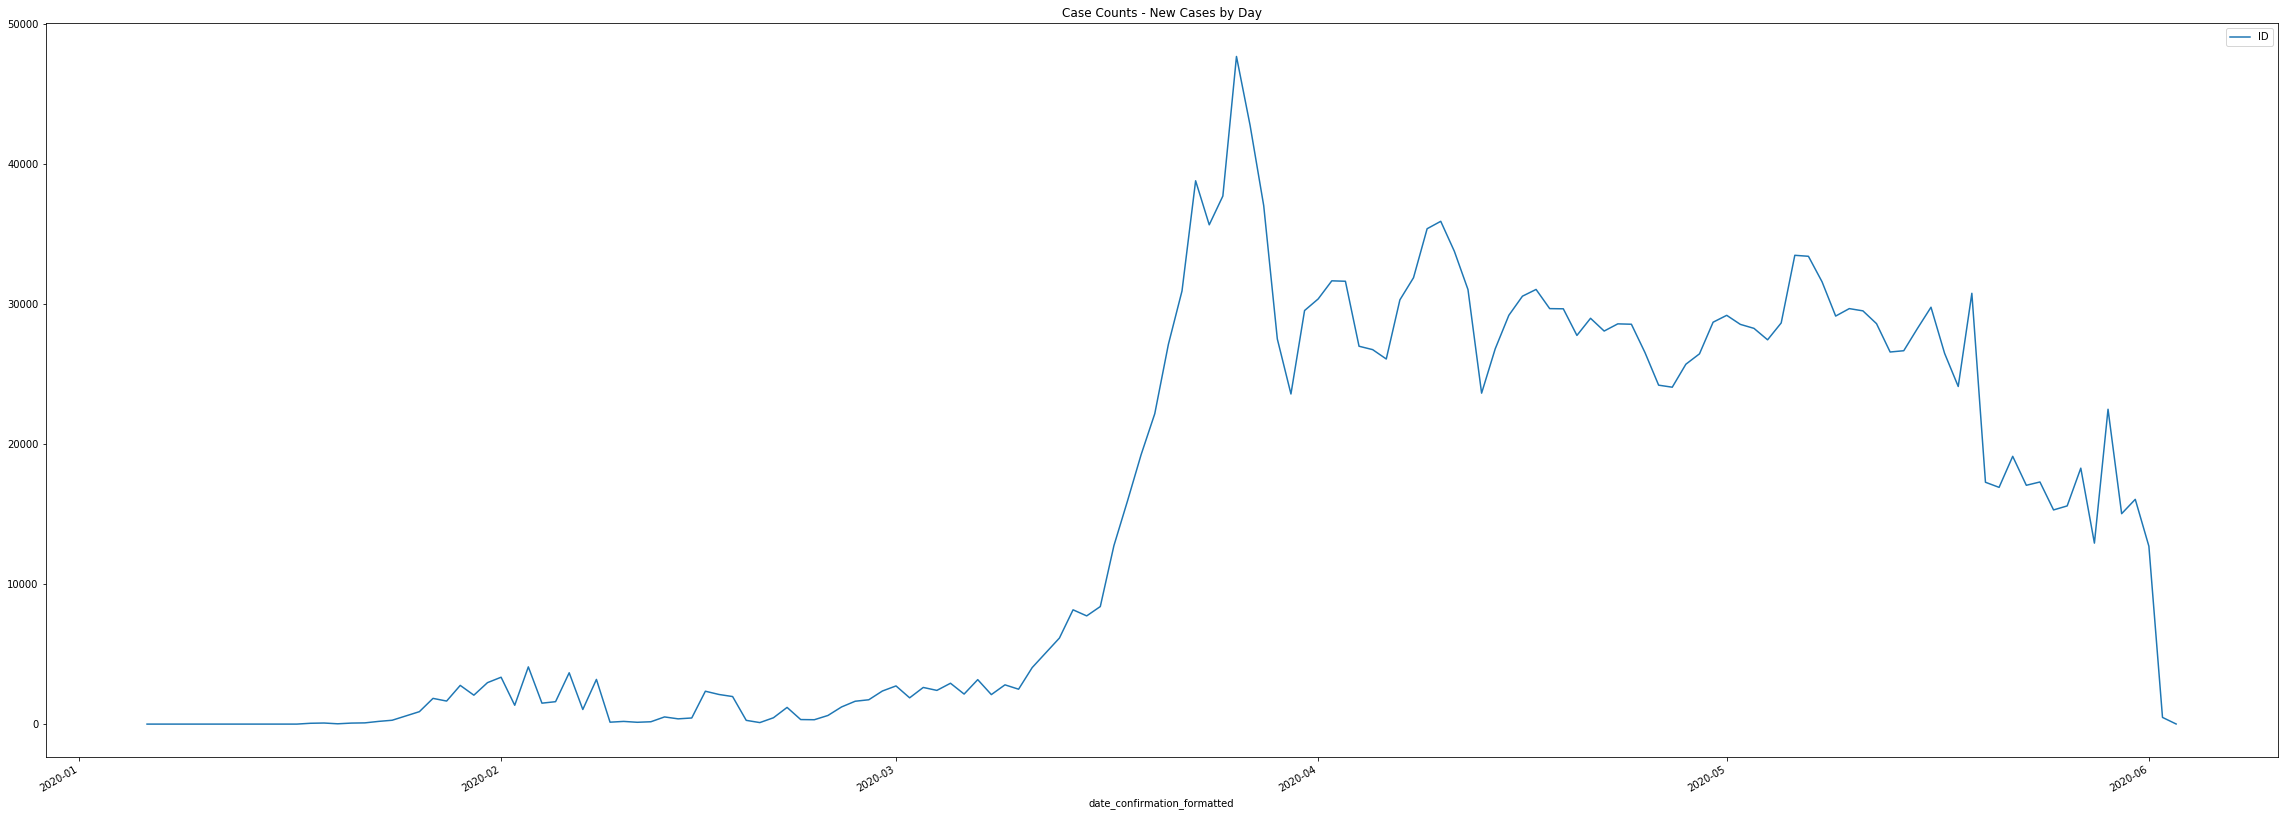

In [34]:
countsByDate.plot(y="ID", figsize=(40,15), title="Case Counts - New Cases by Day")

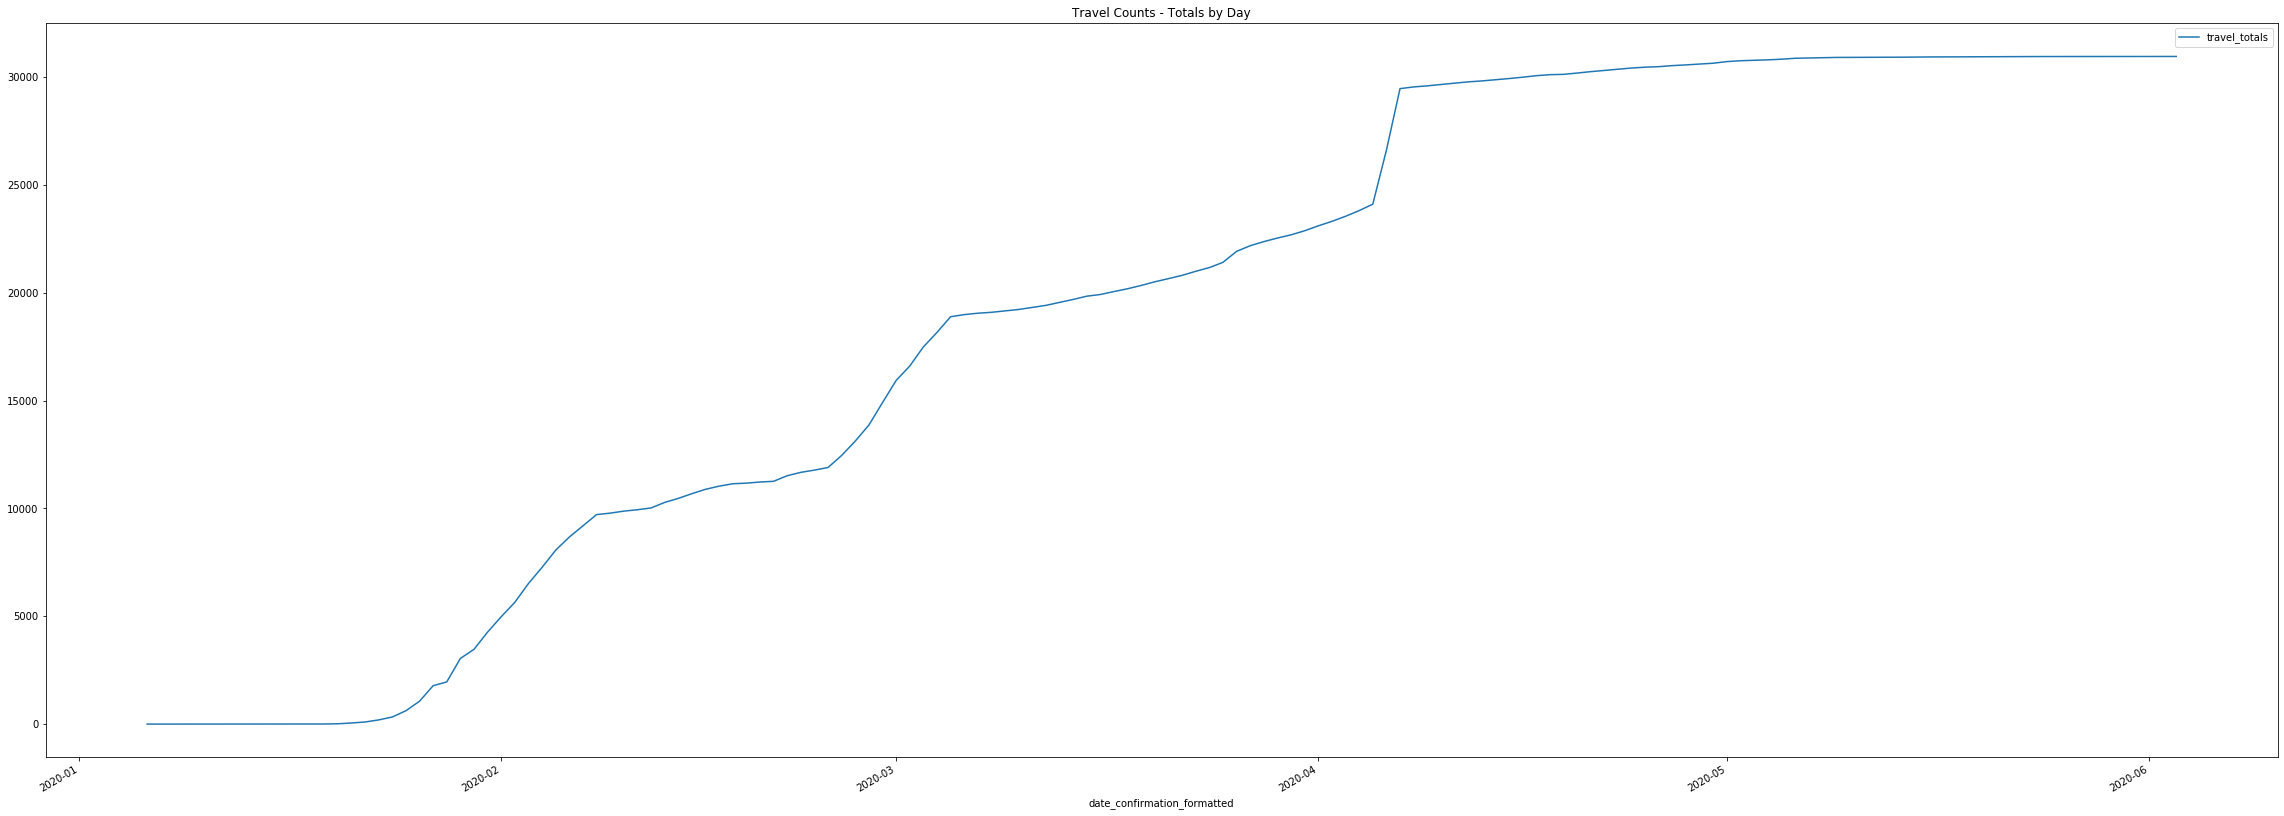

In [35]:
countsByDate.plot(y="travel_totals", figsize=(40,15), title="Travel Counts - Totals by Day")

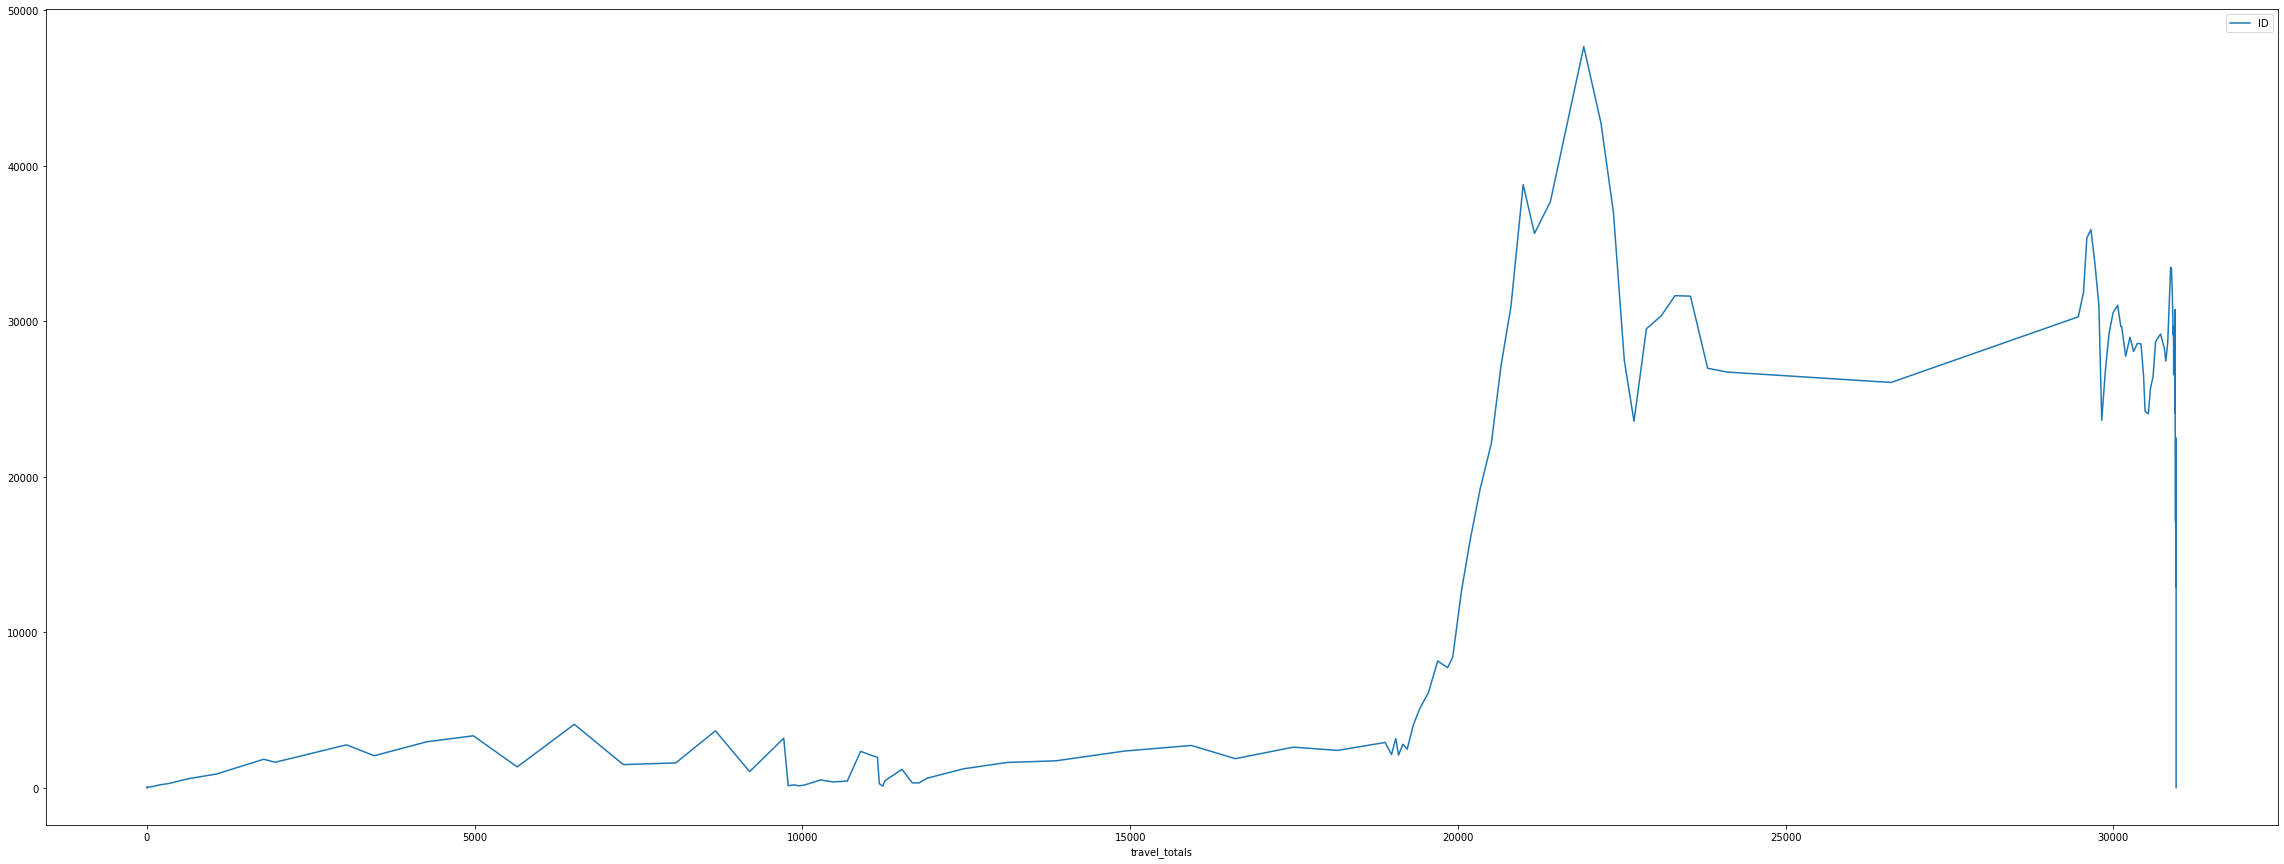

In [37]:
countsByDate.plot(x="travel_totals", y="ID", figsize=(40,15))

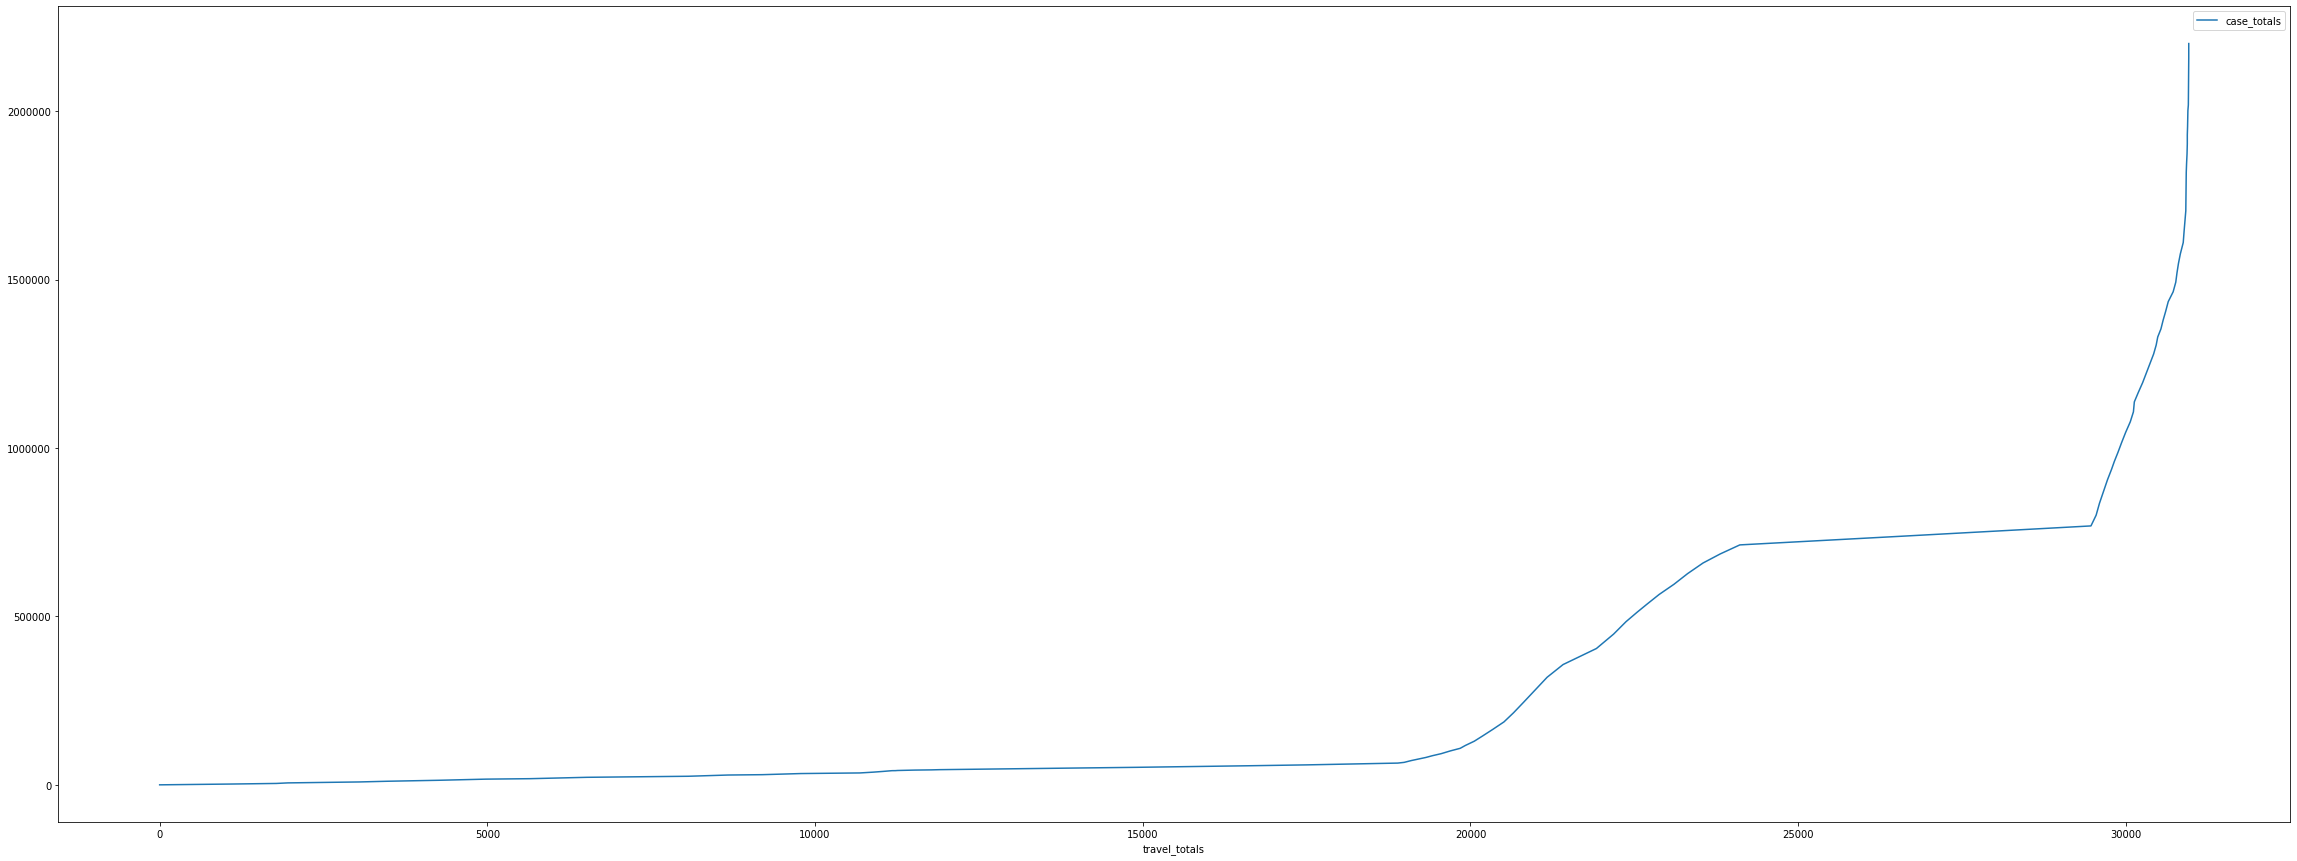

In [38]:
countsByDate.plot(x="travel_totals", y="case_totals", figsize=(40,15))

In [108]:
weeks = [
    countsByDate.loc["2020-01-01":"2020-01-15",:],
    countsByDate.loc["2020-01-16":"2020-01-31",:],
    countsByDate.loc["2020-02-01":"2020-02-15",:],
    countsByDate.loc["2020-02-16":"2020-02-29",:],
    countsByDate.loc["2020-03-01":"2020-03-15",:],
    countsByDate.loc["2020-03-16":"2020-03-31",:],
    countsByDate.loc["2020-04-01":"2020-04-15",:],
    countsByDate.loc["2020-04-16":"2020-04-30",:],
    countsByDate.loc["2020-05-01":"2020-05-15",:],
    countsByDate.loc["2020-05-16":"2020-05-31",:],
    countsByDate.loc["2020-06-01":"2020-06-15",:],
    countsByDate.loc["2020-06-16":"2020-06-30",:]
]
# Number of new cases in a week
count_week = len(countsByDate.loc["2020-01-01":"2020-01-15",:].groupby(["date_confirmation_formatted"]).count())

#Number of travellers in a week
reduced_sum_week = countsByDate.loc["2020-01-01":"2020-01-15",:].groupby(["ID"]).sum()


travel_week = ["travel_history_binary"].values[0]

In [107]:
travel_week["travel_history_binary"]

ID
2    6
Name: travel_history_binary, dtype: int64